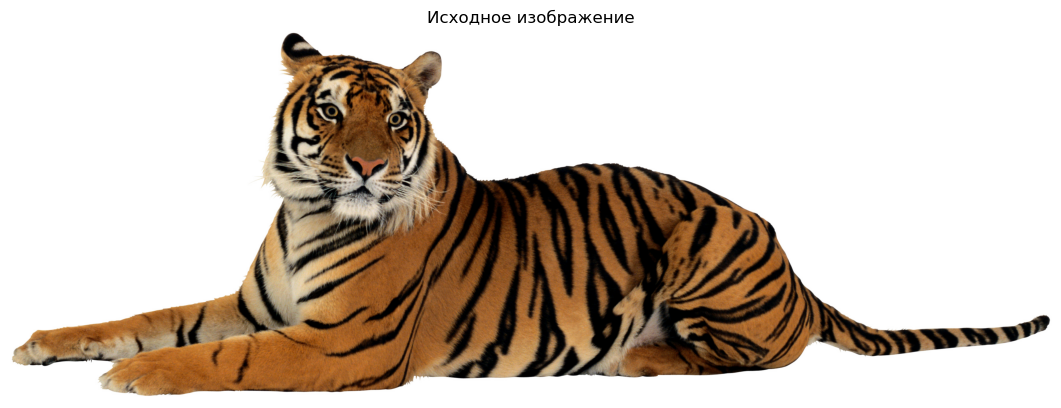

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

gradient = np.abs(sobel_x) + np.abs(sobel_y)

sobel_x_norm = cv2.normalize(sobel_x, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_y_norm = cv2.normalize(sobel_y, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
gradient_norm = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, binary_gradient = cv2.threshold(gradient_norm, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 8))

plt.subplot(1, 1, 1)
plt.title('Исходное изображение')
plt.axis('off') 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

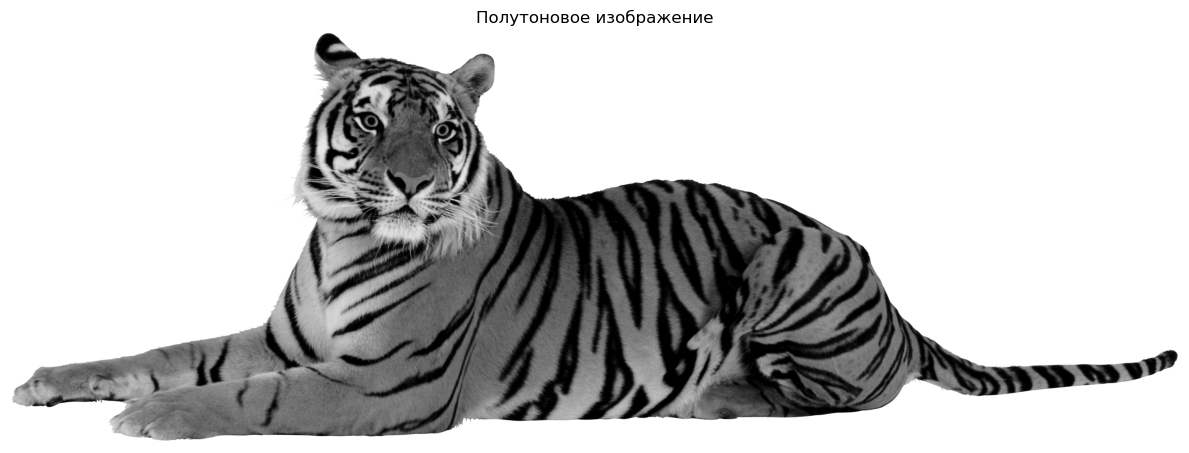

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.title('Полутоновое изображение')
plt.axis('off') 
plt.imshow(gray_image, cmap='gray')
plt.tight_layout()
plt.show()

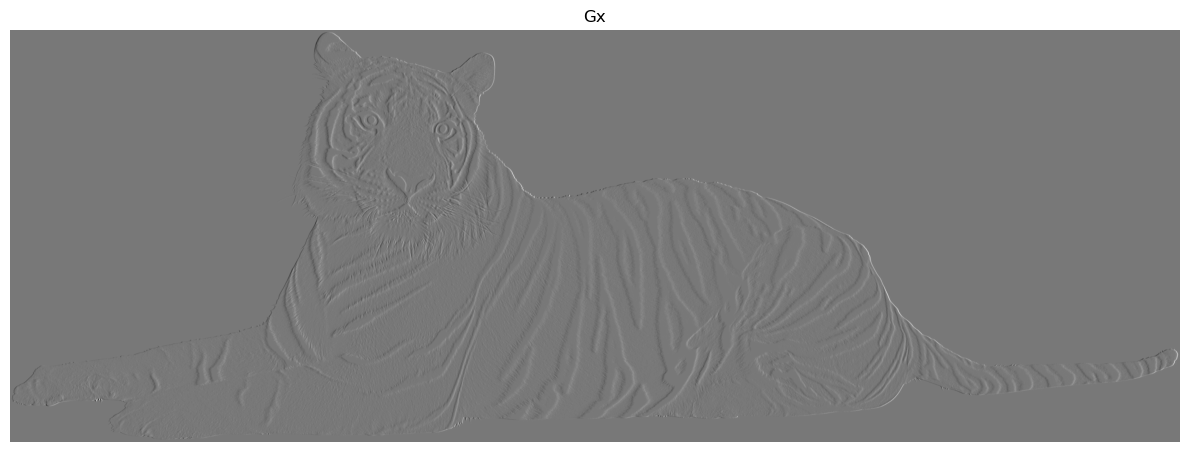

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.title('Gx')
plt.axis('off') 
plt.imshow(sobel_x_norm, cmap='gray')
plt.tight_layout()
plt.show()

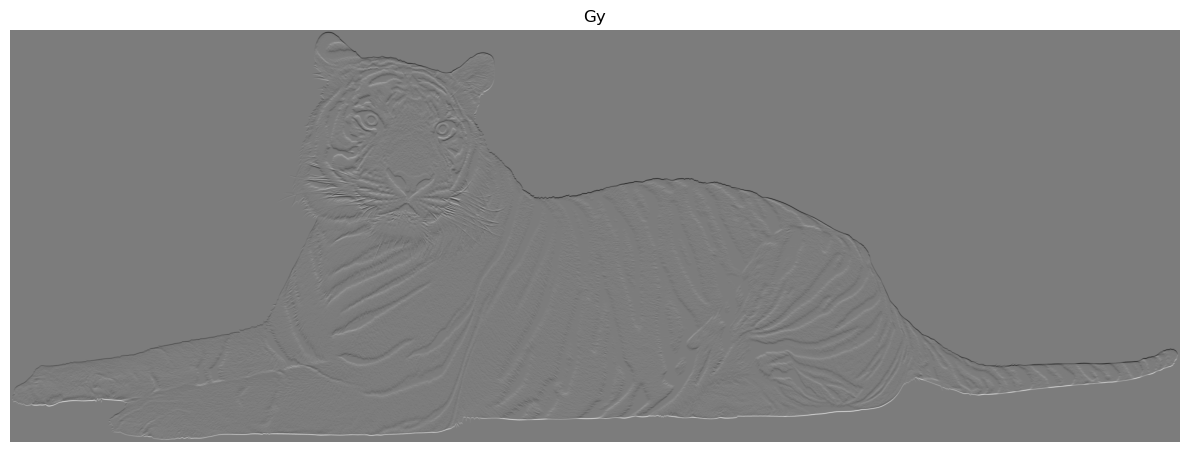

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.title('Gy')
plt.axis('off') 
plt.imshow(sobel_y_norm, cmap='gray')
plt.tight_layout()
plt.show()

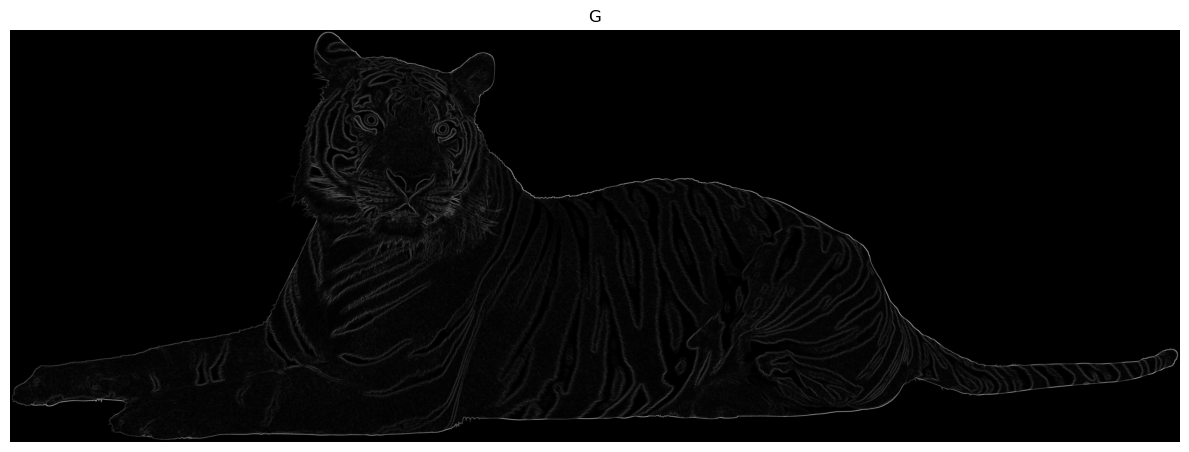

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.title('G')
plt.axis('off') 
plt.imshow(gradient_norm, cmap='gray')
plt.tight_layout()
plt.show()

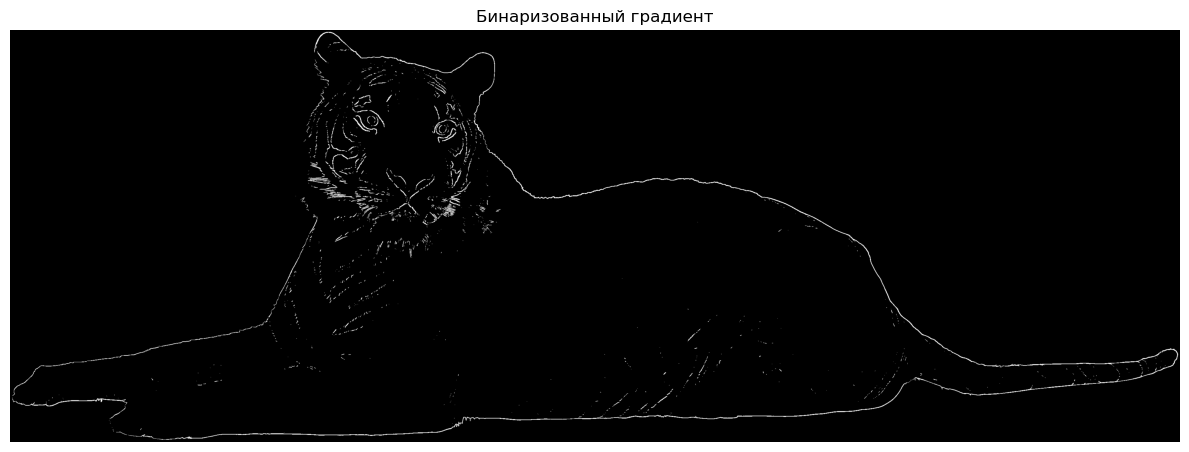

In [33]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.title('Бинаризованный градиент')
plt.axis('off') 
plt.imshow(binary_gradient, cmap='gray')
plt.tight_layout()
plt.show()

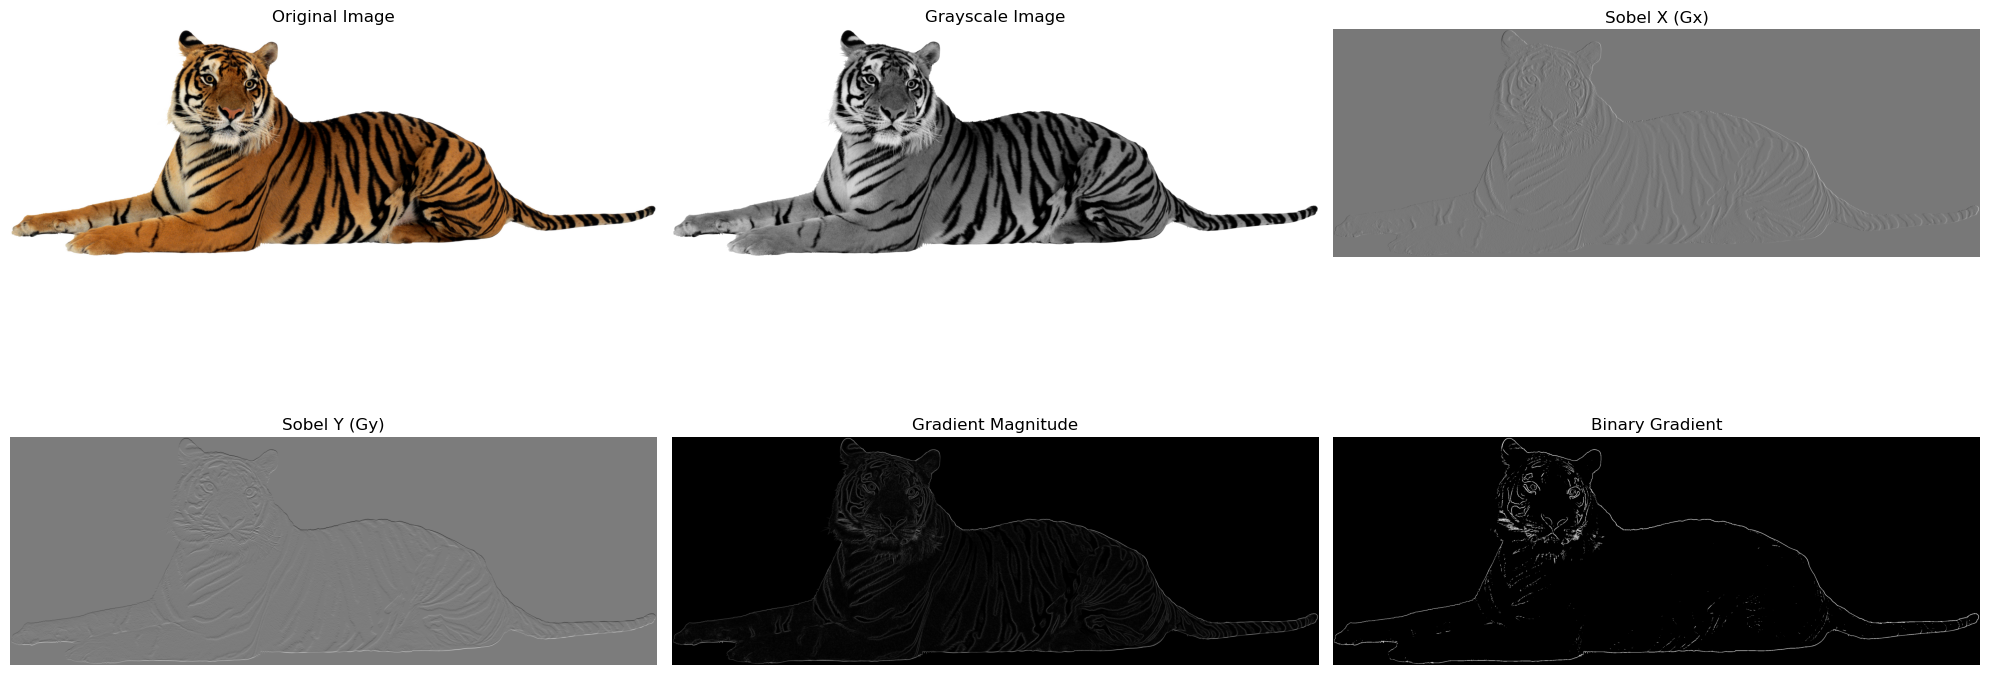

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    padded_img = np.pad(img, pad_width=1, mode='reflect')

    sobel_x = np.zeros(img.shape, dtype=np.float64)
    sobel_y = np.zeros(img.shape, dtype=np.float64)
    gradient = np.zeros(img.shape, dtype=np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sobel_x[i, j] = np.sum(padded_img[i:i+3, j:j+3] * Kx)
            sobel_y[i, j] = np.sum(padded_img[i:i+3, j:j+3] * Ky)

            gradient[i, j] = np.sqrt(sobel_x[i, j]**2 + sobel_y[i, j]**2)

    gradient_norm = ((gradient - gradient.min()) / (gradient.max() - gradient.min()) * 255).astype(np.uint8)

    threshold = 50
    binary_gradient = np.where(gradient_norm > threshold, 255, 0).astype(np.uint8)

    return sobel_x, sobel_y, gradient, gradient_norm, binary_gradient

img_pil = Image.open('image.png')
color_image = np.array(img_pil)
gray_image = np.array(img_pil.convert('L'))

sobel_x, sobel_y, gradient, gradient_norm, binary_gradient = sobel_filters(gray_image)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(color_image)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Sobel X (Gx)')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Sobel Y (Gy)')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Gradient Magnitude')
plt.imshow(gradient_norm, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Binary Gradient')
plt.imshow(binary_gradient, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 3637.5, 1280.5, -0.5)

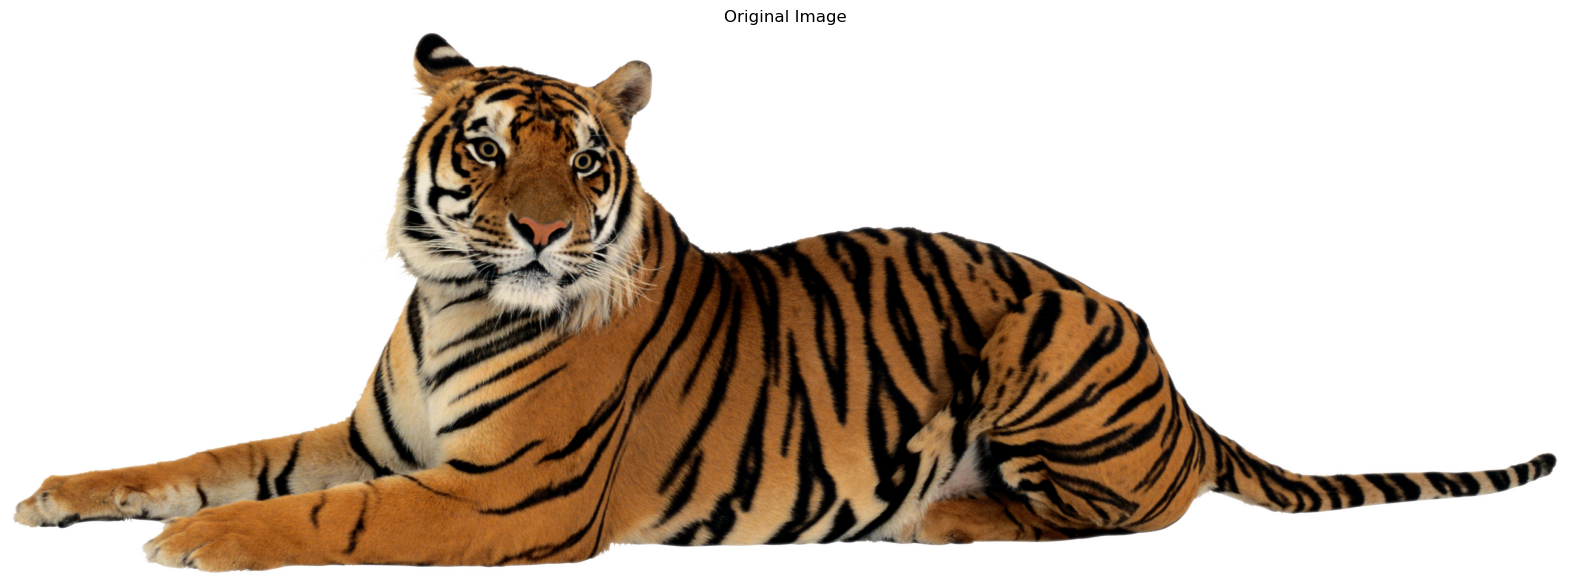

In [6]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 1, 1)
plt.title('Original Image')
plt.imshow(color_image)
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

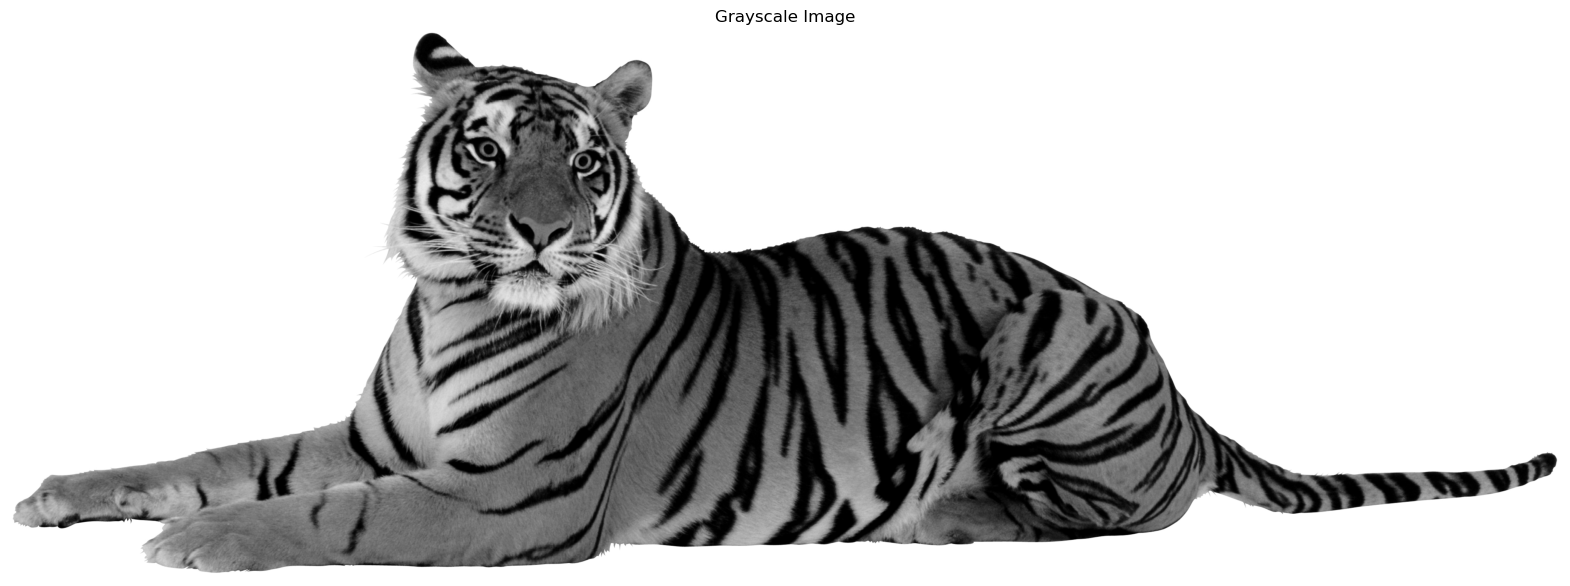

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

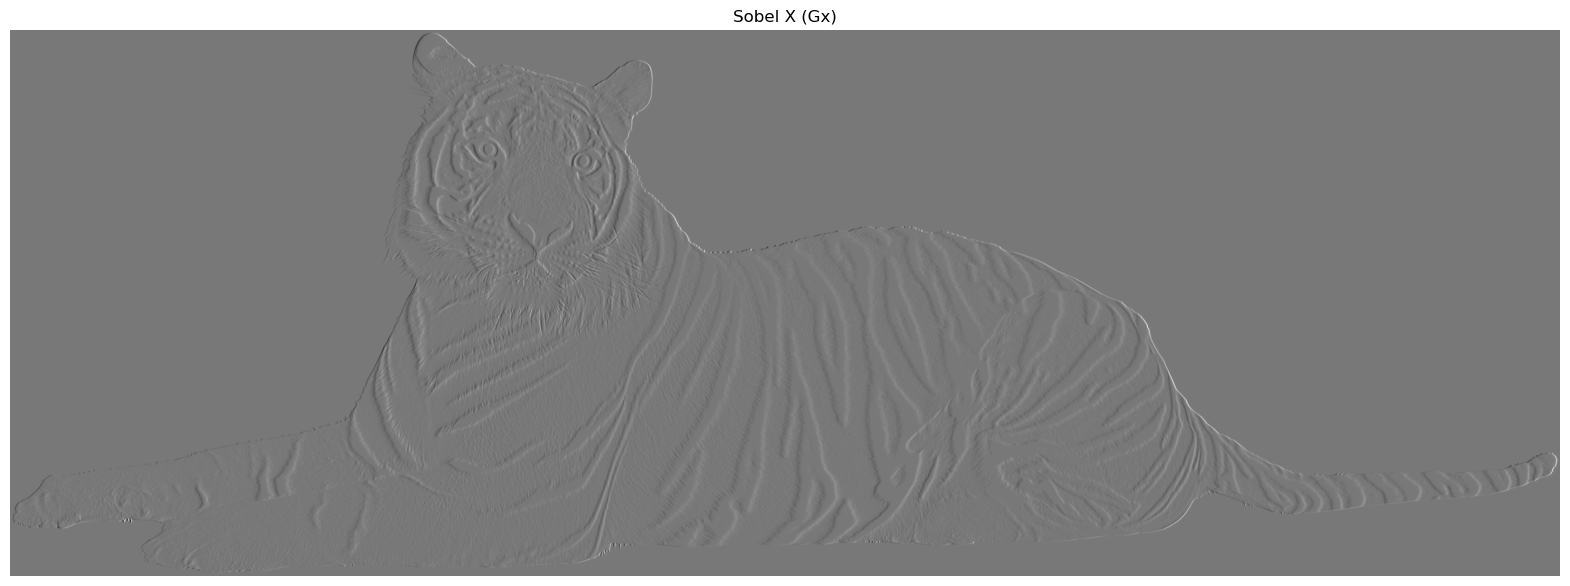

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Sobel X (Gx)')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

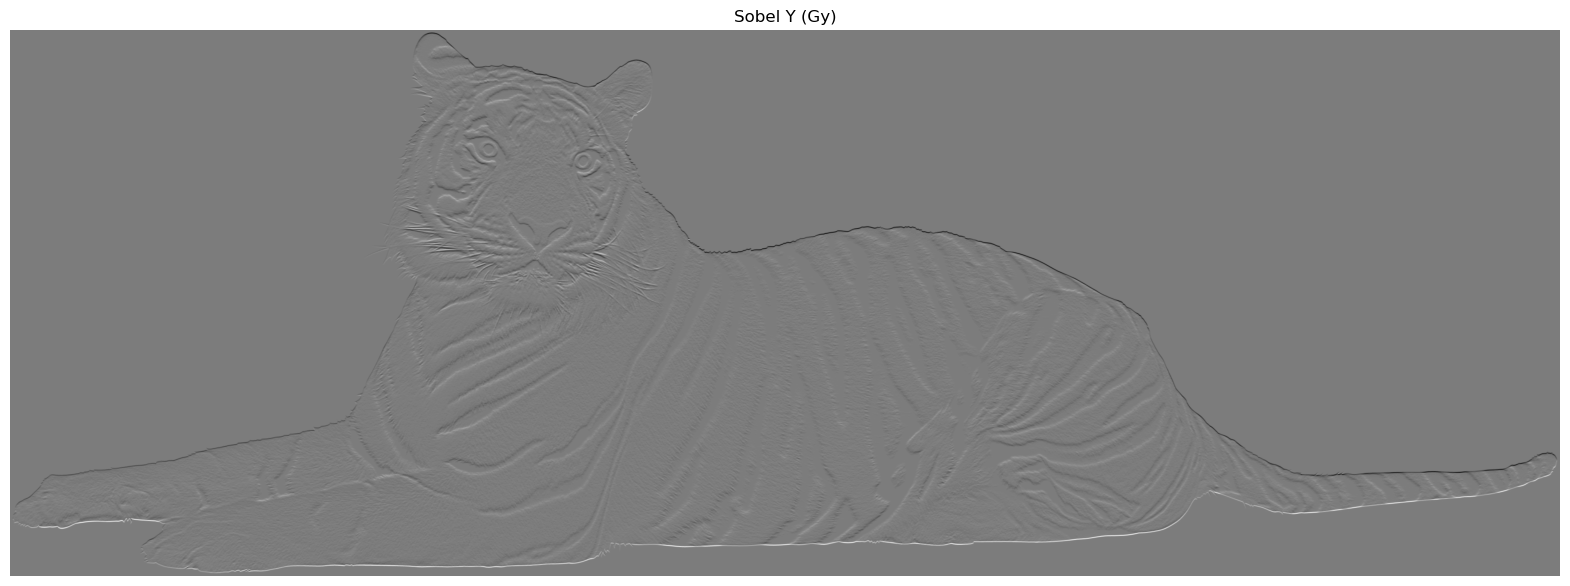

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Sobel Y (Gy)')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

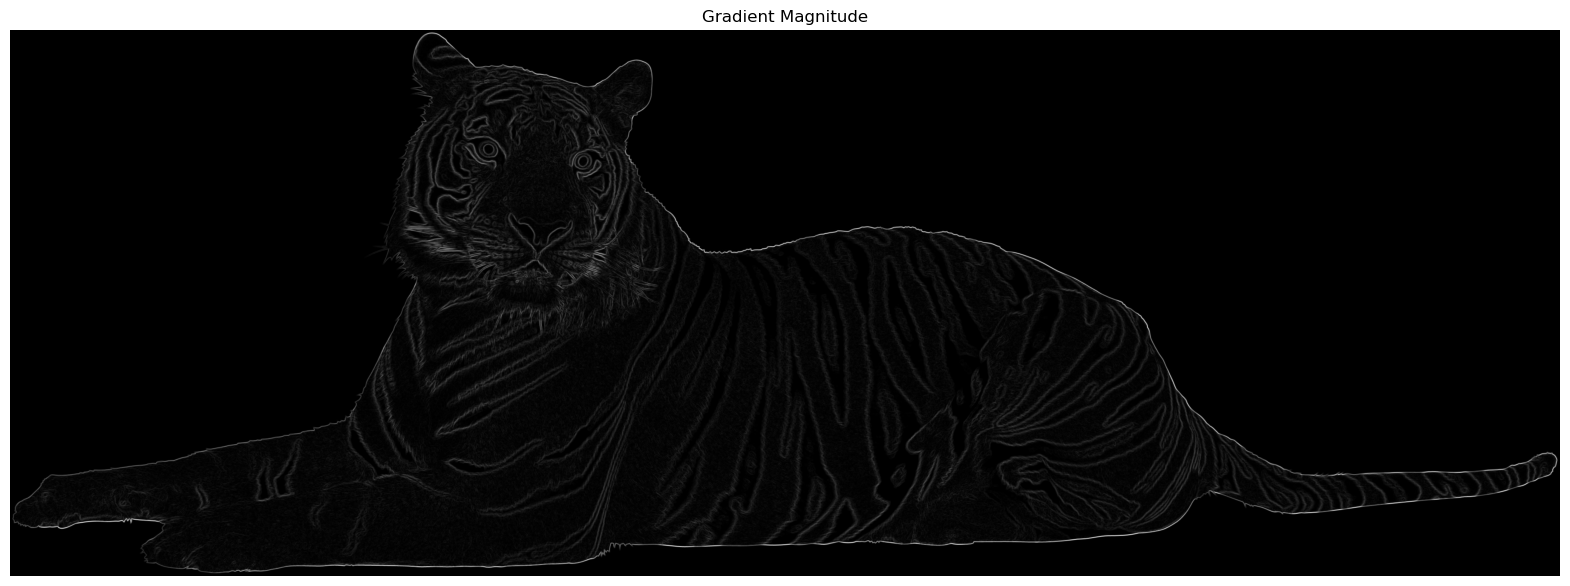

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 1,1)
plt.title('Gradient Magnitude')
plt.imshow(gradient_norm, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

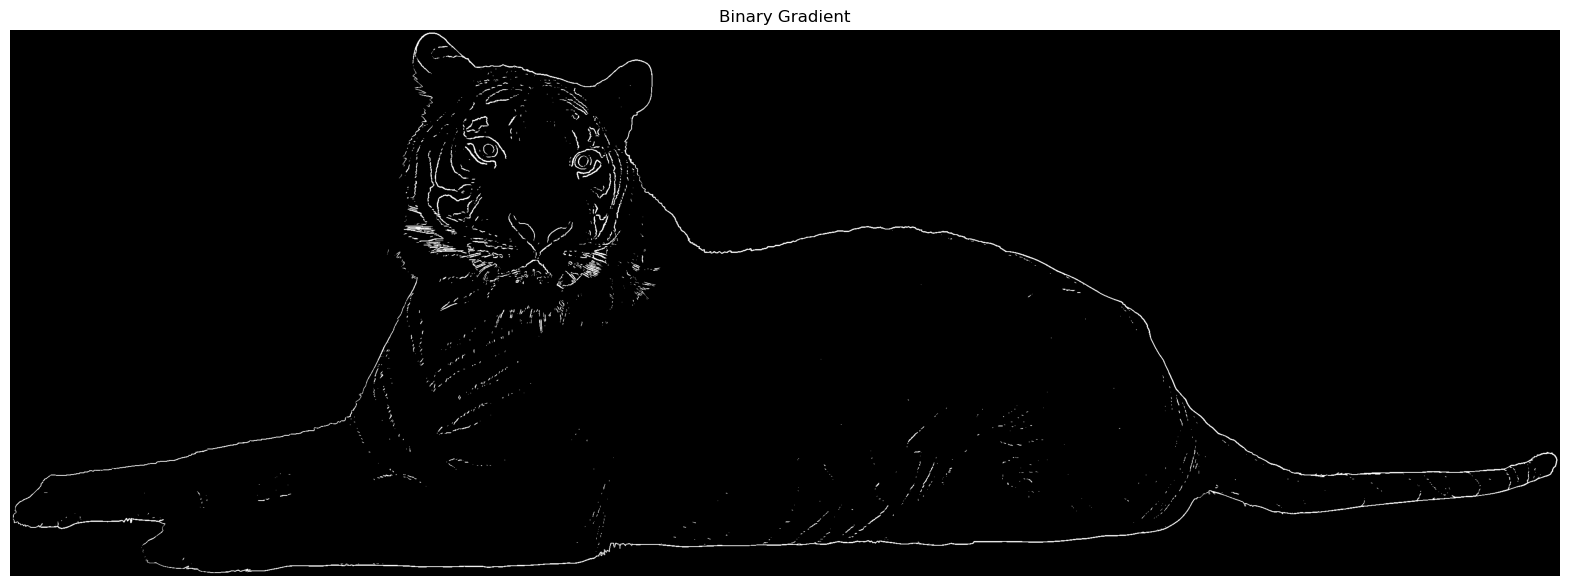

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Binary Gradient')
plt.imshow(binary_gradient, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

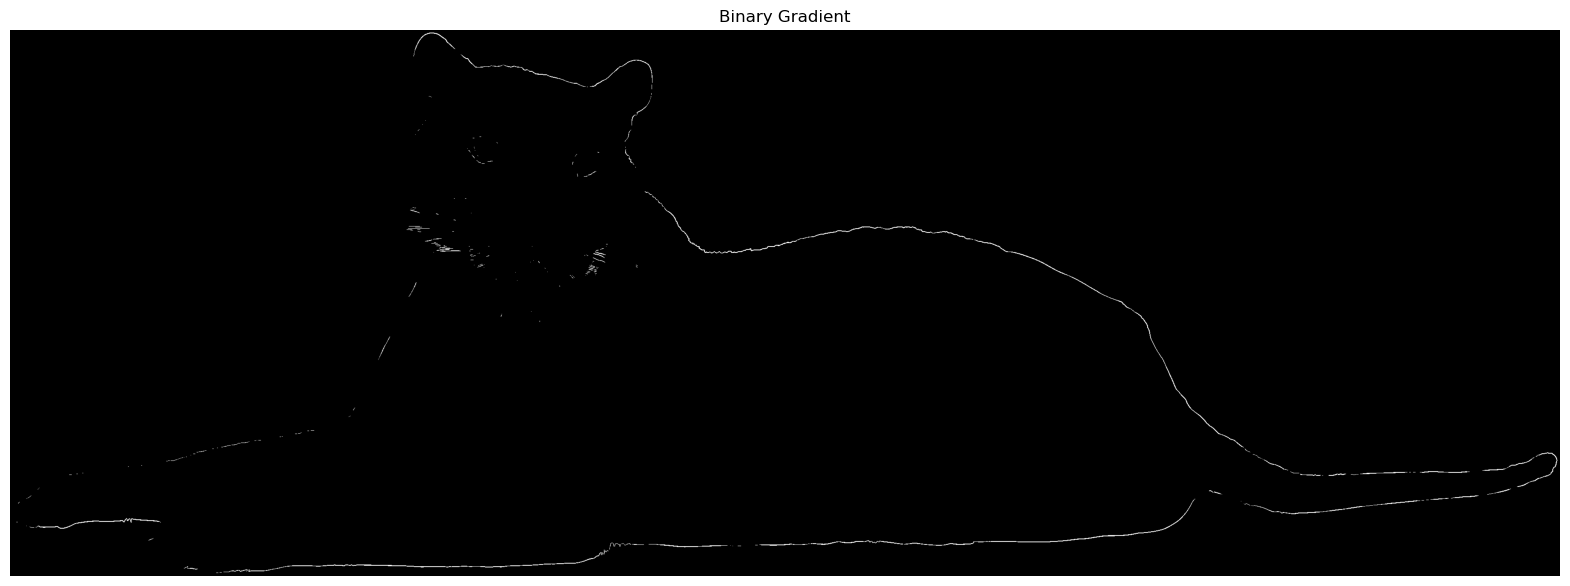

In [8]:
threshold = 100
binary_gradient = np.where(gradient_norm > threshold, 255, 0).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Binary Gradient')
plt.imshow(binary_gradient, cmap='gray')
plt.axis('off')

(-0.5, 3637.5, 1280.5, -0.5)

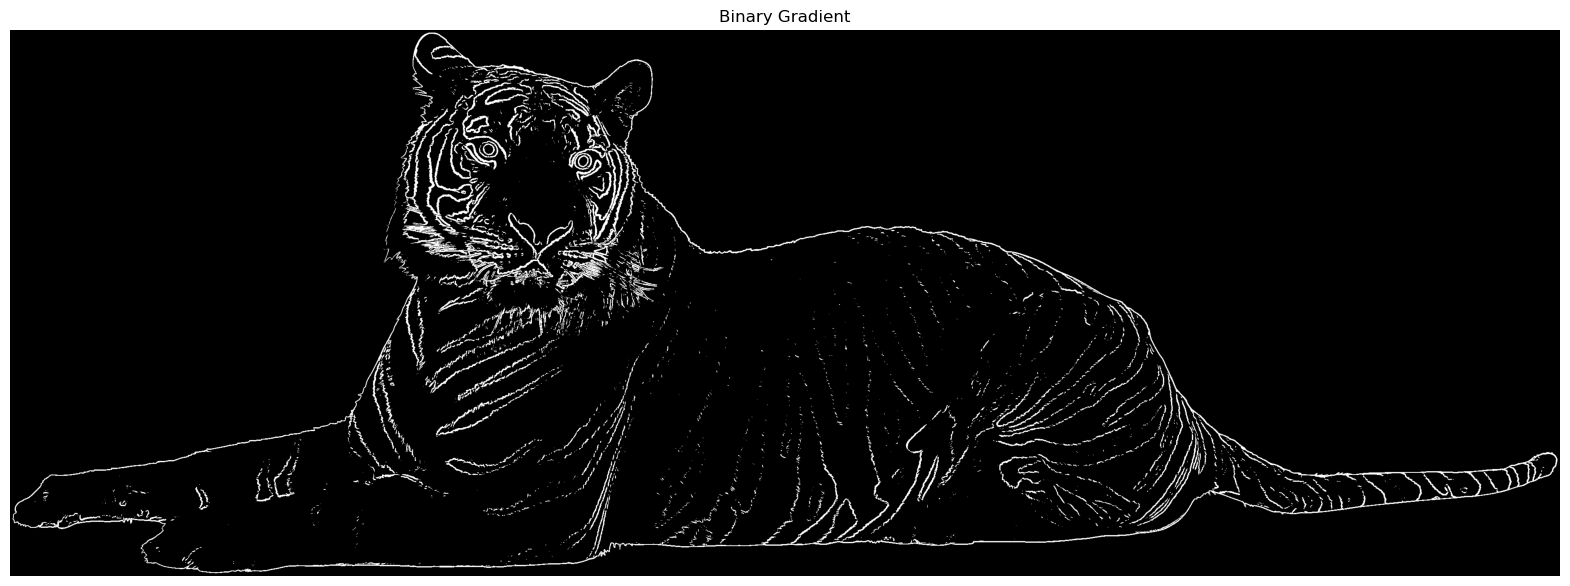

In [10]:
threshold = 30
binary_gradient = np.where(gradient_norm > threshold, 255, 0).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
plt.title('Binary Gradient')
plt.imshow(binary_gradient, cmap='gray')
plt.axis('off')